# 0 - Information

# 1 - Packages

In [1]:
# Math packages
import numpy as np
from scipy import optimize
from scipy.stats import norm

# Graphix packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Progress bar
from tqdm import tqdm

# 2 - Séparation exacte du spectre

## Question 2.1

In [2]:
def generateCovarianceMatrices(lambdas_l, n=1000, nb=250, law="normal"):
    """Generate random covariances matrices for the given list of lambdas."""
    
    # Extract N
    N = len(lambdas_l)

    # Initialisation of the seed
    np.random.seed(42)
    
    # Generate R_N
    R_N_1_2 = np.diag(np.sqrt(lambdas_l))
    
    # Saving array of all the generated covariances matrices
    result = []
    
    # Loop for generating all the covariances matrices
    for i in tqdm(range(nb)):
        
        if law == "normal":
            # Samples normale distributions
            U = np.random.normal(0, 1, size=(N, n))
            V = np.random.normal(0, 1, size=(N, n))
            
            # Compute X with a normal distribution
            X_N = (U + 1j * V) / np.sqrt(2)
        
        if law == "student":
            U = np.random.standard_t(3, size=(N, n))
            V = np.random.standard_t(3, size=(N, n))
            
            # Compute X with a normal distribution
            X_N = (U + 1j * V) / np.sqrt(6)

        # Covariance matrix
        # cov = 1 / N * np.dot(X_N.H, np.dot(R_N, X_N))
        cov = 1 / n * R_N_1_2 @ X_N @ np.conj(X_N).T @ R_N_1_2
        
        # Update result
        result.append(cov)
        
    return result

In [3]:
def samplingSpectrum(lambdas_l, n=1000, nb=200, law="normal"):
    """Generate covariances matrices for the given lambdas and compute the distribution
       of their spectrum."""
    
    # Generate the covariances matrices
    cov_l = generateCovarianceMatrices(lambdas_l, n=n, nb=nb, law=law)
    
    # Saving array
    eigvals_l = []
    
    # Loop over each covariances matrices for computing their spectrum.
    for cov in tqdm(cov_l):
        
        # Compute the spectrum
        eigvals, vectors = np.linalg.eigh(cov)
        
        # Update eigvals_l
        eigvals_l.extend(eigvals)
        
    return eigvals_l

In [4]:
def displayDistribution(lambdas_l, eigvals_l, N, n, nb, bins=50, c_i=True,
                        name="Distribution_Spectrum"):
    """Display the distribution of eigvals given as argument."""
    
    # Display the ratio between N and n
    print("c: {}".format(N/n))
    
    # Display each c_i
    if c_i:
        lambdas, counts = np.unique(lambdas_l, return_counts=True)

        # Count proportion for each true eigenvalue
        nb_lambdas = len(lambdas)
        diff = np.abs(np.tile(np.array(eigvals_l).reshape((-1, 1)), (1, nb_lambdas)) - lambdas)
        lambdas_associated = lambdas[list(np.argmax(-diff, axis=1).reshape(-1))]
        _, counts_observed = np.unique(lambdas_associated, return_counts=True)

        for i, count_i in enumerate(counts):

            # Count the number of time lamda is present in lambdas_l
            N_i = count_i / N
            N_i_observed = counts_observed[i] / (N * nb)

            # Display c_i
            print("c_{} (lambda={}): {}".format(i, lambdas[i], N_i))
            print("Proportion observed: {}".format(N_i_observed))
    
    # Display max of eigenvalues
    print("\nMax of eigen values: {}".format(np.max(eigvals_l)))
    
    # Display the distribution
    plt.figure(figsize=(15, 8))
    plt.hist(eigvals_l, bins=bins)
    
    # Save figure
    plt.savefig("./Results/" + name + ".png", dpi=150, bbox_inches='tight', pad_inches=0)

In [5]:
def generateLambdas(N=20, lambdas=[1, 3, 7], p=[0.2, 0.3, 0.5]):
    """Generate random lambdas_l."""
    
    # Generate the lambdas
    lambdas_l = np.sort(np.random.choice(lambdas, p=p, size=N))
    
    return lambdas_l

100%|██████████| 500/500 [00:00<00:00, 3064.16it/s]


c: 0.02
c_0 (lambda=1): 0.3
Proportion observed: 0.3
c_1 (lambda=3): 0.3
Proportion observed: 0.3
c_2 (lambda=7): 0.4
Proportion observed: 0.4

Max of eigen values: 8.542578466301398


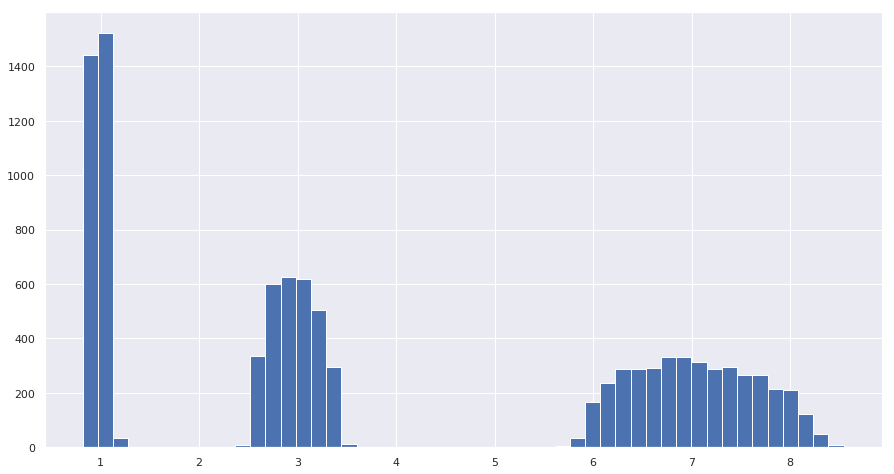

In [6]:
# Choice of N and n and nb
N = 20 # Number of samples per covariances matrix
n = 1000 # Number of features
nb = 500 # Number of covariance matrices to generate

# List of possible lambdas and their probabilities
lambdas = [1, 3, 7]
p = np.array([0.2, 0.3, 0.5])
p /= np.sum(p)

# Generate the lambdas
lambdas_l = generateLambdas(N=N, lambdas=lambdas, p=p)

# Generate the covariances and compute their spectrum
eigvals_l = samplingSpectrum(lambdas_l, n=n, nb=nb)

# Display the distribution
displayDistribution(lambdas_l, eigvals_l, N, n, nb)

Commentaires:
-------------
On choisit la loi normale comme loi ayant un moment d'ordre 4 fini.
On observe alors les trois propriétés attendues:
* Pas de valeur propre qui s'éloigne aux infinis
* Séparation exacte du support de chaque valeur propre
* Le nombre de valeurs propres dans chaque composante connexe est proportionnel à $N_i$

## Question 2.2

Dans cette question, on choisit une loi de moment d'ordre 4 infini (pour les figures ci-dessous, on utilise la loi de Student).

100%|██████████| 500/500 [00:00<00:00, 2848.17it/s]


c: 0.02

Max of eigen values: 140.77385337337358


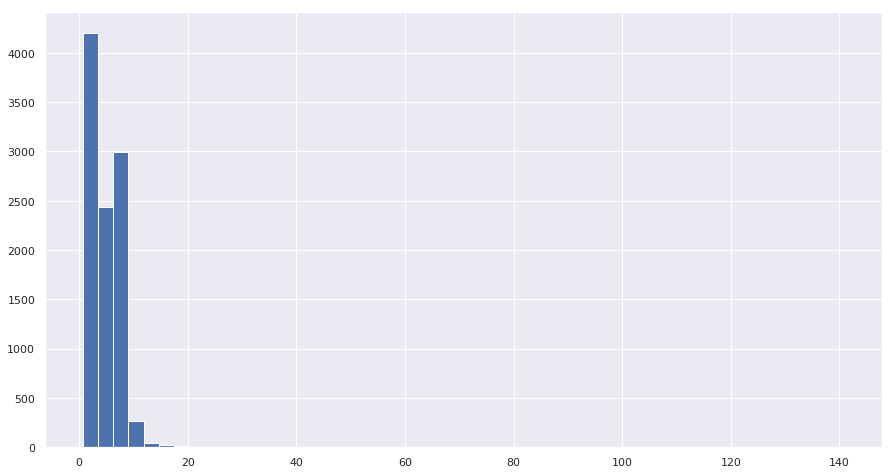

In [7]:
# Choice of N and n
N = 20
n = 1000
nb = 500

# List of possible lambdas and their probabilities
lambdas = [1, 3, 7]
p = np.array([0.2, 0.3, 0.5])
p /= np.sum(p)

# Generate the lambdas
lambdas_l = generateLambdas(N=N, lambdas=lambdas, p=p)

# Generate the covariances and compute their spectrum
eigvals_l = samplingSpectrum(lambdas_l, n=n, nb=nb, law="student")

# Display the distribution
displayDistribution(lambdas_l, eigvals_l, N, n, nb, c_i=False,
                    name="Distribution_Spectrum_Not_separated")

Commentaires:
------------------
Cette fois, on observe:
* Certaines valeurs propres tendent vers l'infini, ou du moins sont beaucoup plus grande qu'attendu
* Il n'y a plus de séparation exacte du spectre

# 3 - Graphe de x(t)

## Question 3.1

In [8]:
def F(t, x, y, c=0.01, lambdas=lambdas, p=p):
    """Compute the value of the function of fixed point t(z)."""
    
    # Initialise result
    result = -(x + 1j * y)
    
    # Loop over all the lambdas
    for k, l in enumerate(lambdas):
        
        result += c * p[k] * (l / (1 + l * t))
    
    return 1 / result

In [9]:
def fixedPoint(x, y=10e-5, c=0.01, init=0, lambdas=lambdas, p=p):
    """Find the fixed point of F for the given x and y."""
    
    # Find the fixed point of F
    func = lambda t : F(t, x, y, c, lambdas=lambdas, p=p)
    t = optimize.fixed_point(func, [init])
    
    return t

In [10]:
def graphf(ax, c=0.01, y=10e-5, nb=500, lambdas=lambdas, p=p, name="Graph_f"):
    """Display the graph of f."""
    
    # Array of real
    x_l = np.linspace(0.5, max(lambdas) + 3, nb)
    
    # Initialisation of graph
    graph = []
    f_x = 0
    
    # Loop over all x
    for x in tqdm(x_l):
        
        f_x = 1 / (np.pi) * np.imag(fixedPoint(x, y=y, c=c, init=f_x, lambdas=lambdas, p=p))
        graph.append(f_x)
    
    # Convert graph as an array
    graph = np.array(graph).reshape(-1)

    # Display the graph of f
    ax.plot(x_l, graph)
    ax.set_xlabel("x", fontsize=22)
    ax.set_ylabel("f(x)", fontsize=22)
    ax.set_title("f(x) for c={}".format(c), fontsize=22)
    
def graphX(ax, c=0.01, nb=1000, lambdas=lambdas, p=p, name="Graph_X"):
    """Display the graph of x."""
    
    # Array of t
    t_l = np.linspace(-1.5, 1.5, nb)
    
    # Filtering of t_l such as -1/t is not in lambdas
    t_l = [t for t in t_l if not((-1 / t) in lambdas)]
    
    # Initialisation of graph
    graph = []
    f_x = 0
    
    # Loop over all t
    for t in tqdm(t_l):
        
        # Initialisation of x
        x = -1 / t
        
        for k, l in enumerate(lambdas):
            
            # Update x
            x += c * p[k] * (l / (1 + l * t))
            
        graph.append(x)
    
    # Convert graph as an array
    graph = np.array(graph).reshape(-1)

    # Display the graph of f
    ax.plot(t_l, graph)
    ax.set_ylim(-5, 15)
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.grid(True)
    ax.set_xlabel("t", fontsize=22)
    ax.set_ylabel("x(t)", fontsize=22)
    ax.set_title("x(t) for c={}".format(c), fontsize=22)
    
    # Save figure
    if not(name is None):
        fig.savefig("./Results/" + name + ".png", dpi=150, bbox_inches='tight', pad_inches=0)

100%|██████████| 500/500 [00:00<00:00, 558.38it/s]


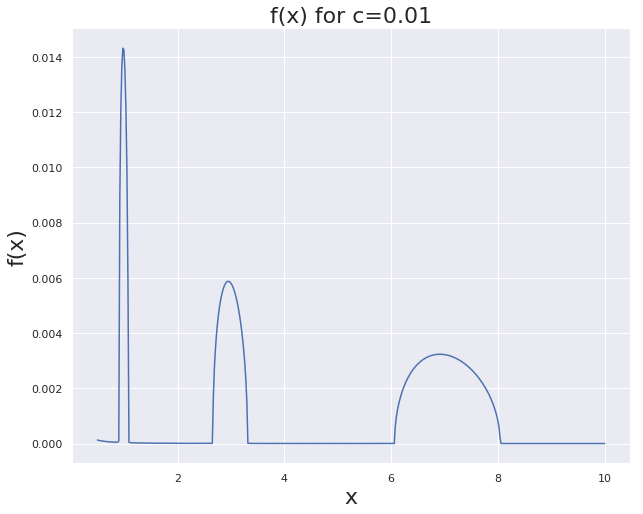

In [11]:
# Display the graph of f
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
graphf(axs)

Commentaires:
------------------

On retrouve la loi du spectre observées précédement via la méthode des histogrammes.

## Question 3.2

In [12]:
def graphX(ax, c=0.01, nb=1000, lambdas=lambdas, p=p, name="Graph_X"):
    """Display the graph of x."""
    
    # Array of t
    t_l = np.linspace(-1.5, 1.5, nb)
    
    # Filtering of t_l such as -1/t is not in lambdas
    t_l = [t for t in t_l if not((-1 / t) in lambdas)]
    
    # Initialisation of graph
    graph = []
    f_x = 0
    
    # Loop over all t
    for t in tqdm(t_l):
        
        # Initialisation of x
        x = -1 / t
        
        for k, l in enumerate(lambdas):
            
            # Update x
            x += c * p[k] * (l / (1 + l * t))
            
        graph.append(x)
    
    # Convert graph as an array
    graph = np.array(graph).reshape(-1)

    # Display the graph of f
    ax.plot(t_l, graph)
    ax.set_ylim(-5, 15)
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.grid(True)
    ax.set_xlabel("t", fontsize=22)
    ax.set_ylabel("x(t)", fontsize=22)
    ax.set_title("x(t) for c={}".format(c), fontsize=22)
    
    # Save figure
    if not(name is None):
        fig.savefig("./Results/" + name + ".png", dpi=150, bbox_inches='tight', pad_inches=0)

100%|██████████| 1000/1000 [00:00<00:00, 230468.93it/s]


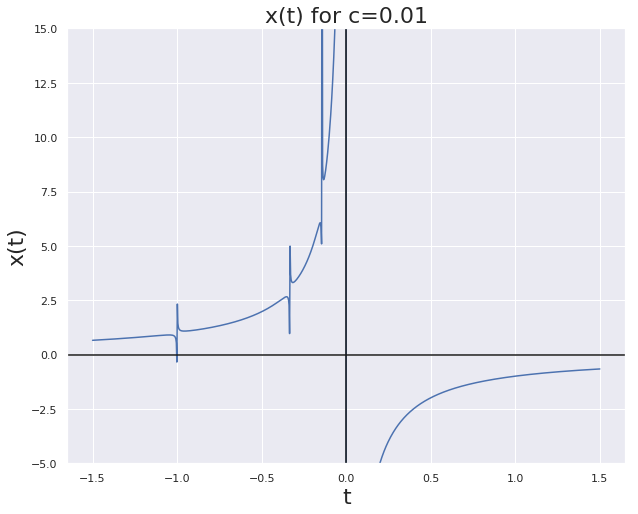

In [13]:
# Display the graph of x
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
graphX(axs)

Commentaires:
------------------
On retrouve bien les asymptotes verticales aux voisinnages des $-1 / \lambda^R_k$

## Question 3.3

### Study of the influence of c

In [14]:
def studyC(name="Study_C"):
    """Study the influence of the parameters."""
    
    # Array of c to test
    c_l = [0.01, 0.2, 2]
    
    # Display the graph of x
    fig, axs = plt.subplots(2, 3, figsize=(25, 16))
    
    # Compute the graph of f for every c
    for k, c_k in enumerate(c_l):
        
        # Add graph of f for c[i]
        graphf(axs[0, k], c=c_k, name=None)
        
        # Add graph of f for c[i]
        graphX(axs[1, k], c=c_k, name=None)
    
    # Save figure
    fig.savefig("./Results/" + name + ".png", dpi=150, bbox_inches='tight', pad_inches=0)

100%|██████████| 1000/1000 [00:00<00:00, 175501.23it/s]


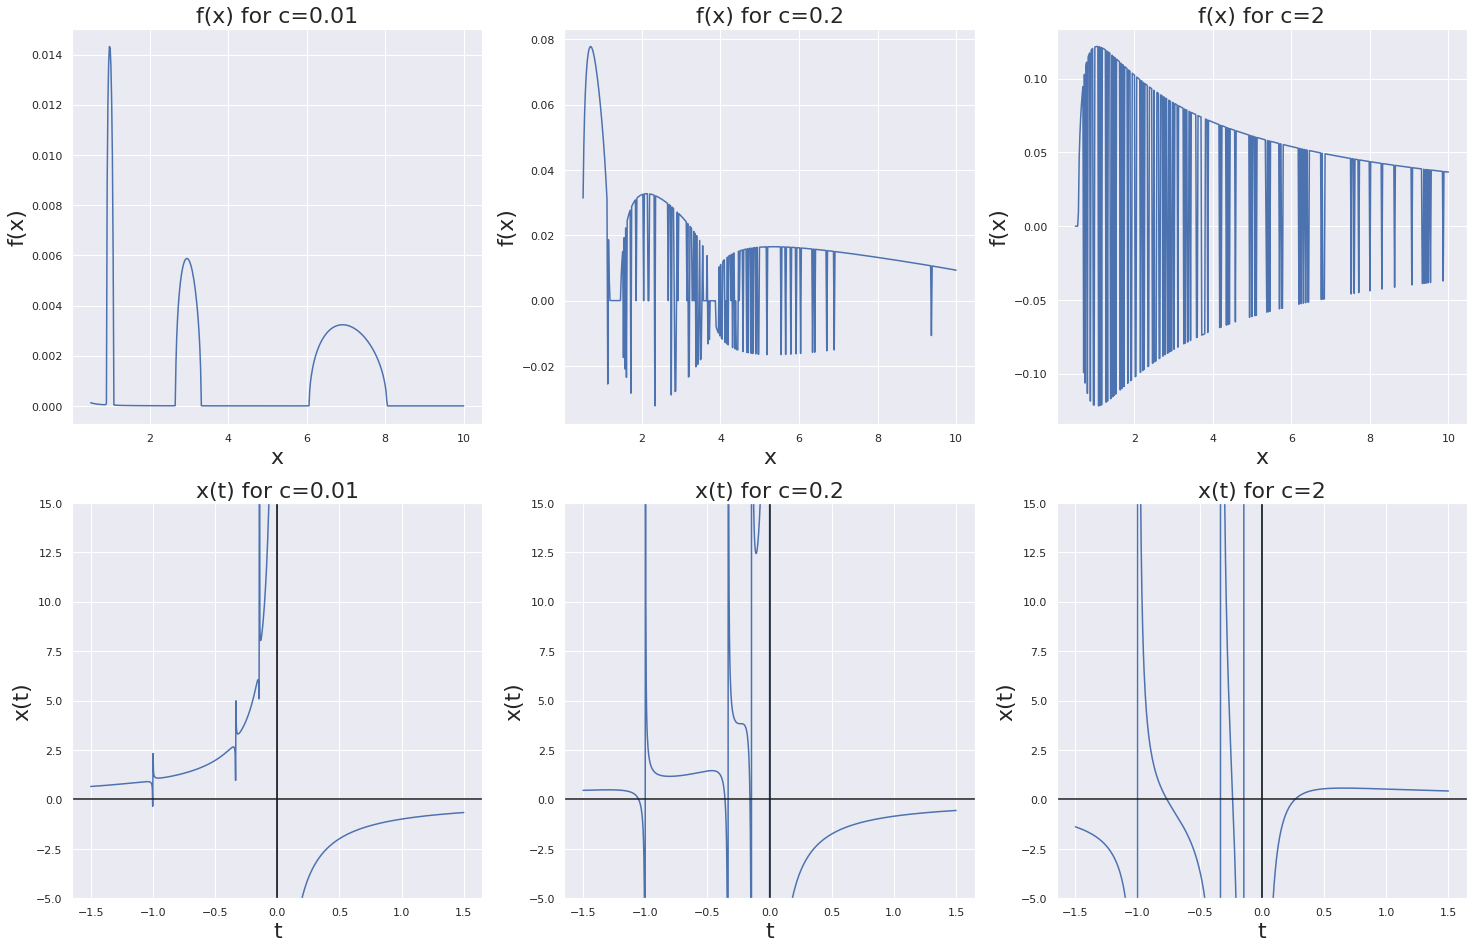

In [15]:
studyC()

Commentaires:
-------------

Ci-dessus sont représentés sur la première ligne le graphe de f et sur la second ligne le graphe de x pour des valeurs de c égales à 0.01, 0.05 et 2.

* Comme on peut l'observer, lorsque que c est faible (cas de c=0.01), les graphes de f et de x correspondent à ce qui étaient attendus.

* Lorsque c augmente (cas de c=0.2), on constate que du "bruit" aparaît par rapport aux graphes que l'on pourrait attendre de f et de x et que la distinction entre les clusters est moins nette. De même les parties croissantes du graphe de x sont plus étroite.

* Finalement, quand c est grand (c=2), on constate que le graphe de f ne correspond plus du tout à ce que l'on peut espérer. De plus le graphe de x admet toujours les mêmes asymptotes mais la croissance de cette fonction n'est plus cohérent avec ce qui est attendu.

In [16]:
def studyCi(lambdas=lambdas, name="Study_C_i"):
    """Study the influence of the parameters."""
    
    # Array of c_i to test
    ci_l = [[3, 7, 10],
            [14, 3, 2],
            [1, 10, 9]]
    
    # Display the graph of x
    fig, axs = plt.subplots(2, 3, figsize=(25, 16))
    
    # Compute the graph of f for every c
    for k, ci_k in enumerate(ci_l):
        
        # Computation of p
        p = ci_k / np.sum(ci_k)
        print(p)
        
        # Add graph of f for c[i]
        graphf(axs[0, k], lambdas=lambdas, p=p, name=None)
        
        # Add graph of f for c[i]
        graphX(axs[1, k], lambdas=lambdas, p=p, name=None)
        
    # Save figure
    fig.savefig("./Results/" + name + ".png", dpi=150, bbox_inches='tight', pad_inches=0)

  0%|          | 0/500 [00:00<?, ?it/s]

[0.15 0.35 0.5 ]


 12%|█▏        | 59/500 [00:00<00:00, 585.57it/s]

[0.73684211 0.15789474 0.10526316]


 10%|█         | 51/500 [00:00<00:00, 507.23it/s]

[0.05 0.5  0.45]


100%|██████████| 1000/1000 [00:00<00:00, 229548.16it/s]


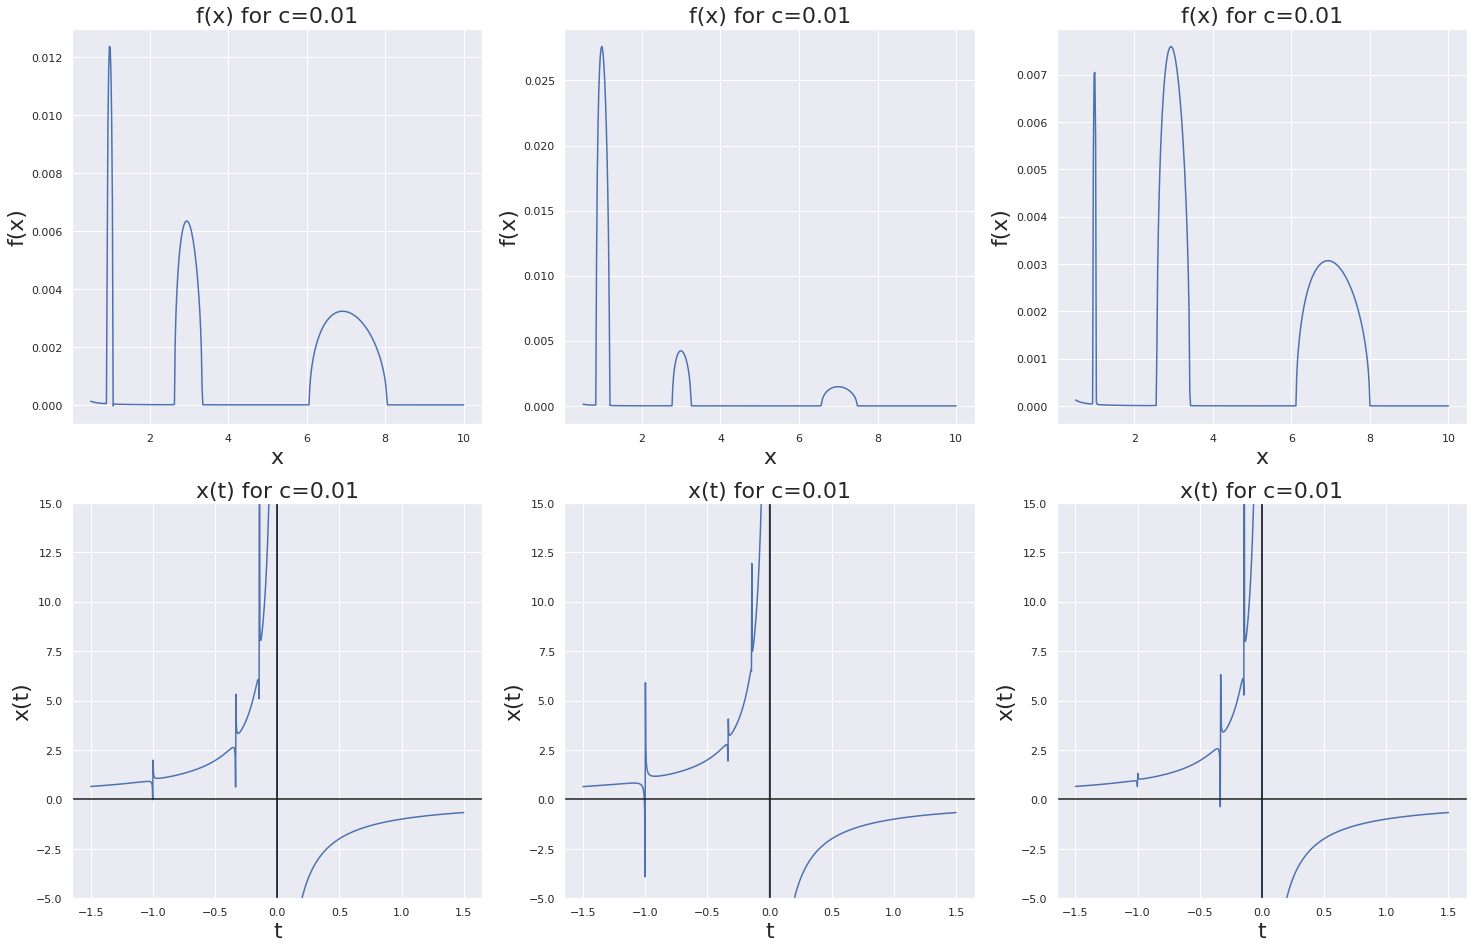

In [17]:
studyCi()

Commentaires:
------------------

Ci-dessus sont représentés les graphes de f (première ligne) et de x (deuxième ligne). On étudie ici l'influence du choix des c_i. On a pris les mêmes lambdas que précédement (1, 3 et 7) mais on a représenté les graphes de f et x pour différents choix de c_i: ([0.15, 0.35, 0.5], [0.73, 0.16, 0.11] et [0.05, 0.5, 0.45] respectivement)

\vspace{2em}

Influence sur le graphe de f:
* Comme vu précédement, on retrouve bien le fait que les parties connexes liés à une valeur propre sont proportionnel à c_i.

* On constate aussi que lorsque qu'un $\lambda_i$ est associé à un c_i faible, alors l'intervalle de sa partie connexe associé est peu étendu.

\vspace{2em}

Influence sur le graphe de x:
* Lorsqu'on a un $c_i$ élevé, on constate une meilleur approximation au niveau de l'asymptote associée à $\lambda_i$.

In [18]:
def studyLambdas(name="Study_Lambdas"):
    """Study the influence of the parameters."""
    
    # Array of c_i to test
    lambdas_l = [[1, 3, 7],
                 [1, 2, 3],
                 [1, 10, 20]]
    
    # Display the graph of x
    fig, axs = plt.subplots(2, 3, figsize=(25, 16))
    
    # Compute the graph of f for every c
    for k, lambdas_k in enumerate(lambdas_l):
        
        # Add graph of f for c[i]
        graphf(axs[0, k], lambdas=lambdas_k, name=None)
        
        # Add graph of f for c[i]
        graphX(axs[1, k], lambdas=lambdas_k, name=None)
        
    # Save figure
    fig.savefig("./Results/" + name + ".png", dpi=150, bbox_inches='tight', pad_inches=0)

100%|██████████| 1000/1000 [00:00<00:00, 228647.19it/s]


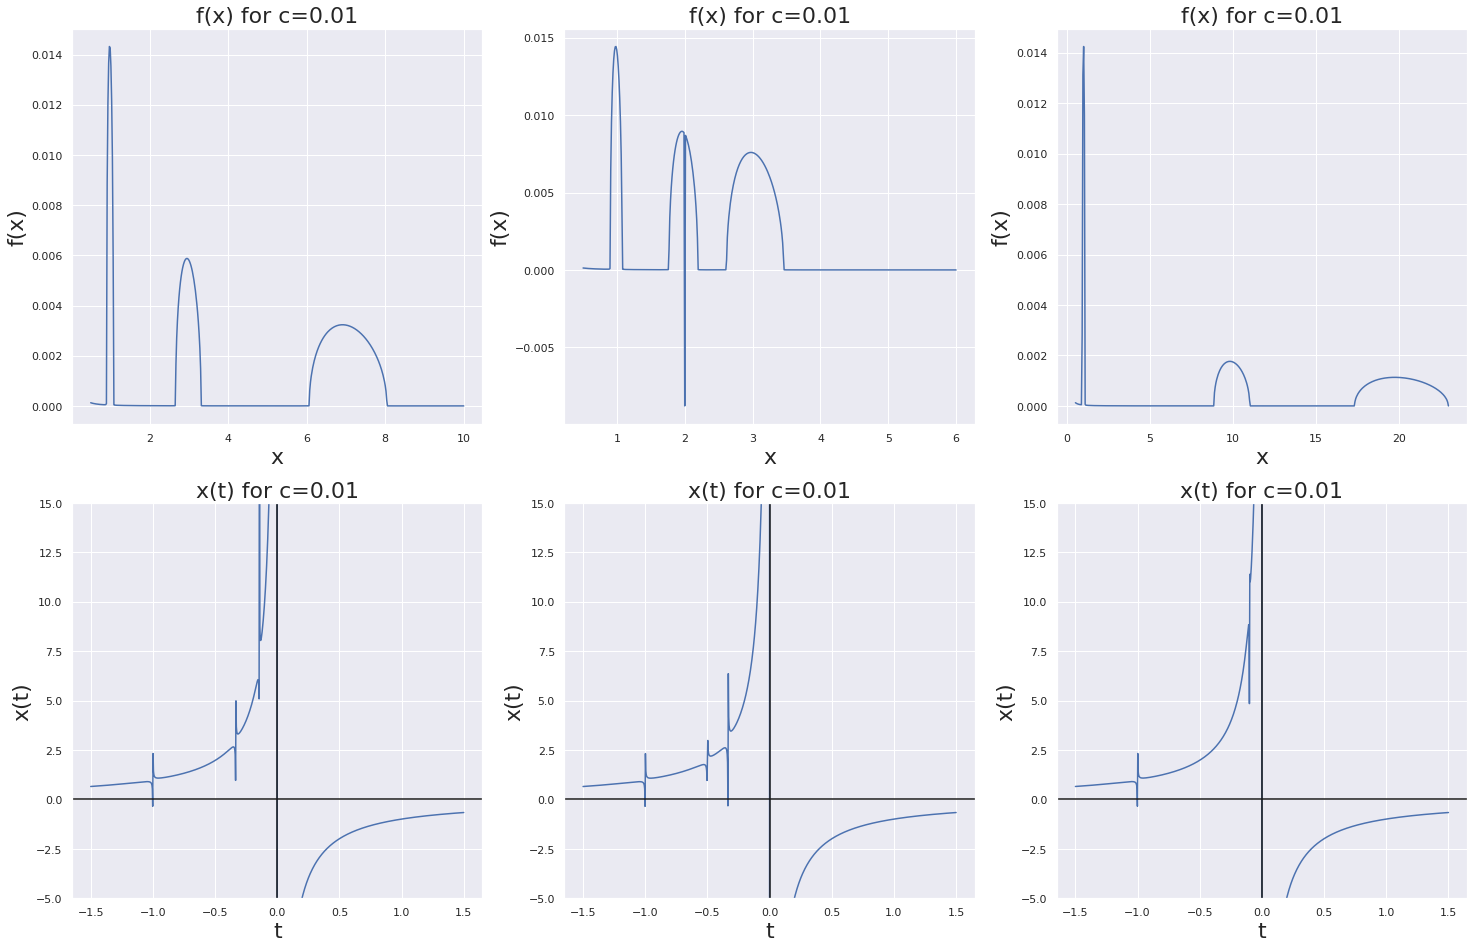

In [19]:
studyLambdas()

Commentaires:
-----------------

Ci-dessus sont représentés les graphes de f (première ligne) et de x (deuxième ligne). On étudie ici l'influence du choix des $\lambda_i$. On a pris les mêmes $c_i$ que précédement ([0.2, 0.3, 05]) mais on a représenté les graphes de f et x pour différents choix de $\lambda_i$: ([1, 3, 7], [1, 2, 3] et [1, 10, 20] respectivement).

\vspace{2em}

Influence sur le graphe de f:
* On constate que plus un $\lambda_i$ est grand, plus sa partie connexe associé est étendue.

\vspace{2em}

Influence sur le graphe de x:
* On constate que plus les $\lambda_i$ sont grands, plus leur asymptote associé ont tendance à se chevaucher vu qu'elles tendent toutes vers l'asymptote $x=0$.



# 4 - Estimation des $\lambda_i^R$

## Question 4.1

Grâce aux simulations réalisées pour la partie séparation exacte de spectre, on sait que l'ensemble de paramètres (N=20, n=1000, nb=500, law="normal", lambdas=[1, 3, 7]) est un ensemble qui satisfait les conditions énoncées.

## Question 4.2.(a)

En utilisant la fonction d'approximation $f(x) = x$ et en utilisant les résultats vu en cours ainsi que les résultats des exercices 3 et 4, on obtient les résultats ci-dessous:
\begin{equation*}
    \lambda_k(R_N) \approx \frac{n}{N_k} \sum_{i \in \mathcal{C}_k} (\lambda_i - \eta_i)
\end{equation*}

Avec:
\begin{itemize}
    \item $\mathcal{C}_k$ un contour entourant $\lambda_k$.
    \item $\eta_i$ sont les valeurs propres de $\Lambda - aa^*$ où $\Lambda = diag(\lambda_1, \cdots, \lambda_n)$ et $a = \frac{1}{n}(\sqrt{\lambda_1}, \cdots, \sqrt{\lambda_n})^T$.
\end{itemize}

Grâce aux résultats de l'exercice 3 de la feuille d'exercice "Inférence", on peut estimer facilement les eta_i.

In [20]:
def computeEta(cov, n=1000):
    """Compute the eta associated to cov."""
            
    # Compute the eigen values of cov.
    eigvals = np.real(np.linalg.eigvals(cov))

    # Build \Lambda
    L = np.diag(eigvals)

    # Build a
    a = 1 / np.sqrt(n) * np.sqrt(eigvals).reshape((-1, 1))

    # Build \Lambda - aa*
    R = L - a @ a.T

    # Compute the eta
    etas = np.linalg.eigvals(R)
    
    return etas

In [21]:
def estimationLambda(cov_l, lambdas_l, C=[[0.1, 1.9], [2, 4], [5, 9]], n=1000,
                     lambdas_init=[1, 3, 7]):
    """Estimate \Lambda_k. Take for argument a contour of Lambda_k and samples of cov."""
    
    # Number of samples
    nb = len(cov_l)
    
    # Shape of cov
    N, _ = np.shape(cov_l[0])
    
    # Initialisation of the estimation of lambda_k
    estimators_l = [[] for i in lambdas_init]
    
    # Loop over all the matrices inside cov_l
    for cov in tqdm(cov_l):
        
        # Compute the eta associated
        etas = computeEta(cov, n=n)
        
        # Compute the lambdas associated
        lambdas = np.real(np.linalg.eigvals(cov))
        
        # Loop for each lambdas to approximate
        for k, lambda_k_true in enumerate(lambdas_init):
            
            # Count N_k
            N_k = list(lambdas_l).count(lambda_k_true)
        
            # Filter all the value inside etas and lambdas that are in C
            etas_C = list(filter(lambda x: (C[k][0] <= x) & (x <= C[k][1]), etas))
            lambdas_C = list(filter(lambda x: (C[k][0] <= x) & (x <= C[k][1]), lambdas))

            # Update the estimation of lambda_k
            estimators_l[k].append(n / N_k * (np.sum(lambdas_C) - np.sum(etas_C)))
        
    return np.array(estimators_l)

In [22]:
# Choice of N and n
N = 20
n = 1000
nb = 100

# List of possible lambdas and their probabilities
lambdas = [1, 3, 7]
p = np.array([0.2, 0.3, 0.5])
p /= np.sum(p)

# Generate the lambdas
lambdas_l = generateLambdas(N=N, lambdas=lambdas, p=p)

# Generate the covariances matrices
cov_l = generateCovarianceMatrices(lambdas_l, n=n, nb=nb, law="normal")

# Estimation of \lambda_k
C = [[0.1, 1.9], [2, 4], [5, 9]]
estimators_l = estimationLambda(cov_l, lambdas_l, lambdas_init=lambdas, C=C, n=n)

# Display the estimation
print(estimators_l.mean(axis=1))

100%|██████████| 100/100 [00:00<00:00, 713.77it/s]

[0.99988322 3.00165179 7.00306499]


Commentaires:
------------------

Pour chacun des lambdas réel, on trouve une bonne estimation avec une erreur inférieur à 1%

## Question 4.2.(b)

In [23]:
def displayDistributionLambdasK(N=60, n=3000, nb=5000, p=[0.2, 0.3, 0.5], lambdas=[1, 3, 7],
                                C=[[0.1, 1.9], [2, 4], [5, 9]], bins=25,
                                name="Distrib_Lambda_K"):
    """Display the distribution of the estimator of the lambdas given as argument."""
    
    # Generate the lambdas
    lambdas_l = generateLambdas(N=N, lambdas=lambdas, p=p)
    print(np.unique(lambdas_l, return_counts=True))
    # Generate the covariances matrices
    cov_l = generateCovarianceMatrices(lambdas_l, n=n, nb=nb, law="normal")
    
    # Estimation of \lambda_k
    estimators_l = estimationLambda(cov_l, lambdas_l, lambdas_init=lambdas, C=C, n=n)
    
    # Initialisation of the figure
    fig, axs = plt.subplots(1, 3, figsize=(21, 8))
    
    # Computation of the MSE for each lambda_k
    for k, lambda_k in enumerate(lambdas):

        # Display the mean and the std of the estimators of lambdas_k
        mean = np.mean(estimators_l[k])
        std = np.std(estimators_l[k])
        print("Estimators of \lambda_k, Mean: {}, Std: {}".format(mean, std))
        
        # Compute the histogram of estimator_l[k]
        values_true, edges_true = np.histogram(estimators_l[k], bins=bins)
        values_true = values_true / np.sum(values_true)
        edges_true = (edges_true[1:] + edges_true[:-1]) / 2
        width_true = 0.8 * (edges_true[1]- edges_true[0])
                                       
        # Values for the gaussian
        samples = np.random.normal(mean, std, 100000)
        values_g, edges_g = np.histogram(samples, bins=bins)
        values_g = values_g / np.sum(values_g)
        edges_g = (edges_g[1:] + edges_g[:-1]) / 2
        width_g = 0.8 * (edges_g[1]- edges_g[0])
        
        # Display the distribution
        axs[k].bar(edges_true, values_true, width=width_true,
                   label="Histogram of \hat\lambda_k", color="b")
        axs[k].plot(edges_g, values_g, label="Approximated Gaussian", color="r", alpha=0.5,
                    linewidth=5)
        axs[k].legend()
        axs[k].grid(True)
        
    # Save figure
    fig.savefig("./Results/" + name + ".png", dpi=150, bbox_inches='tight', pad_inches=0)

  0%|          | 3/5000 [00:00<02:59, 27.80it/s]

(array([1, 3, 7]), array([12, 21, 27]))


100%|██████████| 5000/5000 [00:28<00:00, 176.23it/s]


Estimators of \lambda_k, Mean: 0.9999366490970637, Std: 0.0053872341560806366
Estimators of \lambda_k, Mean: 3.000076966101833, Std: 0.012384529153843526
Estimators of \lambda_k, Mean: 7.000068696532266, Std: 0.025046936385514244


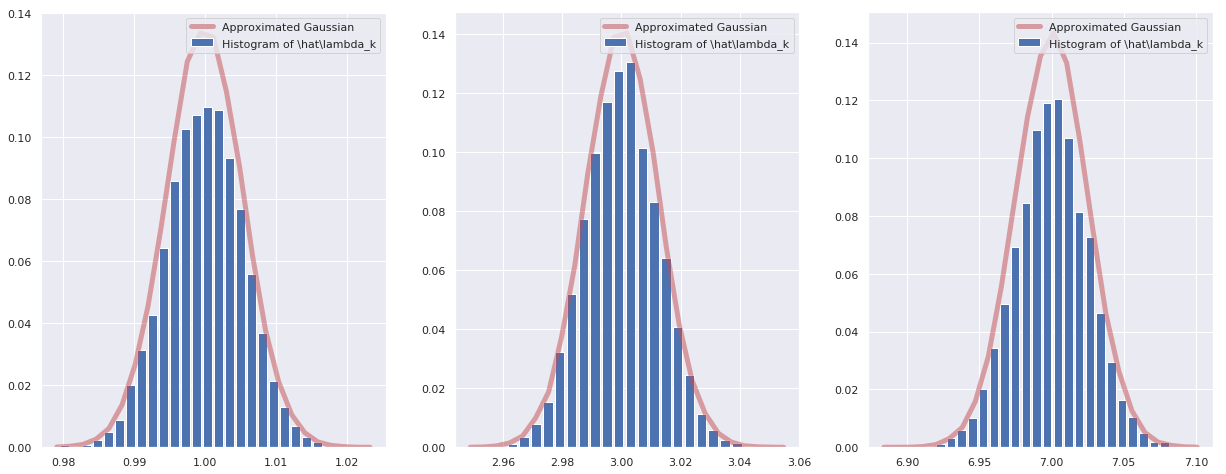

In [24]:
# Display distribution of the lambdas_k
displayDistributionLambdasK()

Commentaires:
------------------

D'après les histogrammes précédents, il semblerait que des estimateurs suivant des lois gaussiennes de moyennes $\lambda_k$ et de variances dépendant des $\lambda_k$ soient de bons estimateurs. Ici, on a pris pour variance, la variance empirique des $\lambda_k$.

## Question 4.2.(c)

In [25]:
def displayMSEN(nb_N=10, nb=100, p=[0.2, 0.3, 0.5], lambdas=[1, 3, 7],
                C=[[0.1, 1.9], [2, 4], [5, 9]], name="MSE_N"):
    """Display the MSE."""
    
    # Saving array of mse errors
    mse_l = [[] for i in range(len(lambdas))]
    
    # Sequences of N
    N_l = np.linspace(5, 80, nb_N, dtype=np.int)
    n_l = np.array([N * 50 for N in N_l])
    
    # Loop over each N in N_L
    for i, N in enumerate(N_l):
        
        # Extract n
        n = n_l[i]

        # Generate the lambdas
        lambdas_l = generateLambdas(N=N, lambdas=lambdas, p=p)
        
        # Generate the covariances matrices
        cov_l = generateCovarianceMatrices(lambdas_l, n=n, nb=nb, law="normal")

        # Estimation of \lambda_k
        estimators_l = estimationLambda(cov_l, lambdas_l, lambdas_init=lambdas, C=C, n=n)

        # Loop over each lambdas
        for k, lambda_k in enumerate(lambdas):
        
            # Compute MSE
            mse = np.mean((estimators_l[k] - lambda_k) ** 2)
            mse_l[k].append(mse)
        
    # Initialisation of the figure
    fig, axs = plt.subplots(1, 1, figsize=(10, 8))
    axs.grid(True)
    axs.set_ylabel("MSE", fontsize=22)
    axs.set_xlabel("N", fontsize=22)
    axs.set_title("MSE over N", fontsize=22)
    
    # Display the mse for each lambdas
    for k, lambda_k in enumerate(lambdas):
        
        # Display the mse over N for the current lambda_k
        axs.plot(N_l, mse_l[k], label="\lambda_k = {}".format(lambda_k),
                 marker="x", linestyle="--")
        
    # Activation of the legend
    axs.legend()
    
    # Save figure
    fig.savefig("./Results/" + name + ".png", dpi=150, bbox_inches='tight', pad_inches=0)

100%|██████████| 100/100 [00:02<00:00, 34.93it/s]


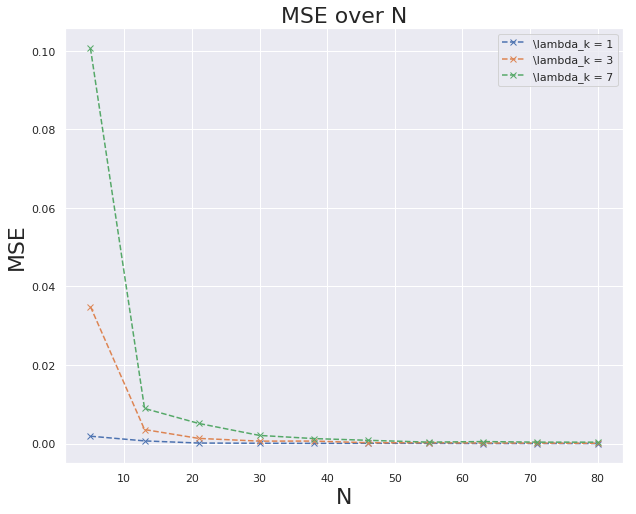

In [26]:
# Display MSE over N
displayMSEN()

Commentaires:
------------------

Grâce à ce graphique, on en déduit que les estimateurs $\hat\lambda_k^N$ ont une variance qui décroît avec N et qui dépend aussi de $\lambda_k$  de manière croissante.

## Question 4.2.(d)

Pour notre approximation naive, on va simplement prendre la moyenne des lambdas empiriques dans chacune des parties connexes.

In [27]:
def naiveEstimation(N, n, cov_l, lambdas=[1, 3, 7], C=[[0.1, 1.9], [2, 4], [5, 9]]):
    """Naive estimation of the lambdas."""
    
    # Number of samples of cov
    nb = len(cov_l)
    
    # Resulting array of estimators
    estimators_l = [0 for i in range(len(lambdas))]
    
    # Loop over the cov
    for cov in cov_l:
        
        # Compute the eigen values of cov
        eigvals = np.real(np.linalg.eigvals(cov))
        
        # Loop over each cluster for updating the estimation of lambda_k
        for k in range(len(lambdas)):
             
            # Filter all the value inside etas and lambdas that are in C
            lambdas_C = list(filter(lambda x: (C[k][0] <= x) & (x <= C[k][1]), eigvals))
            
            # Update estimators
            estimators_l[k] += np.mean(lambdas_C) / nb
            
    return estimators_l

In [28]:
def displayMSENaive(nb_N=10, nb=20, p=[0.2, 0.3, 0.5], lambdas=[1, 3, 7],
                    C=[[0.1, 1.9], [2, 4], [5, 9]], name="naive_MSE"):
    """Display the MSE."""
    
    # Saving array of mse errors
    mse_l = [[] for i in range(len(lambdas))]
    
    # Sequences of N
    N_l = np.linspace(5, 1000, nb_N, dtype=np.int)
    n_l = np.array([N * 50 for N in N_l])
    
    # Loop over each N in N_L
    for i, N in enumerate(N_l):
        
        # Extract n
        n = n_l[i]

        # Generate the lambdas
        lambdas_l = generateLambdas(N=N, lambdas=lambdas, p=p)
        
        # Generate the covariances matrices
        cov_l = generateCovarianceMatrices(lambdas_l, n=n, nb=nb, law="normal")

        # Estimation of \lambda_k
        estimators_l = naiveEstimation(N, n, cov_l, lambdas=lambdas, C=C)

        # Loop over each lambdas
        for k, lambda_k in enumerate(lambdas):
        
            # Compute MSE
            mse = np.mean((estimators_l[k] - lambda_k) ** 2)
            mse_l[k].append(mse)
        
    # Initialisation of the figure
    fig, axs = plt.subplots(1, 1, figsize=(10, 8))
    axs.grid(True)
    axs.set_ylabel("MSE", fontsize=22)
    axs.set_xlabel("N", fontsize=22)
    axs.set_title("MSE over N", fontsize=22)
    
    # Display the mse for each lambdas
    for k, lambda_k in enumerate(lambdas):
        
        # Display the mse over N for the current lambda_k
        axs.plot(N_l, mse_l[k], label="\lambda_k = {}".format(lambda_k),
                 marker="x", linestyle="--")
        
    # Activate the legend
    axs.legend()
    
    # Save figure
    fig.savefig("./Results/" + name + ".png", dpi=150, bbox_inches='tight', pad_inches=0)

100%|██████████| 20/20 [00:00<00:00, 3125.06it/s]
/home/pierre/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/pierre/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 20/20 [05:52<00:00, 17.94s/it]


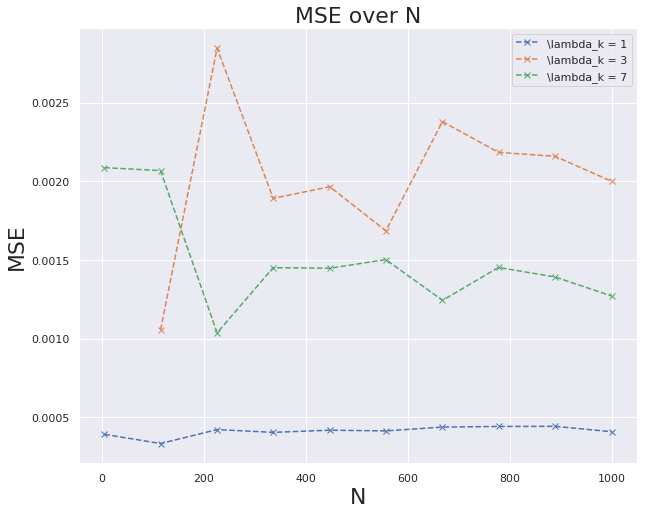

In [29]:
displayMSENaive()

Commentaires:
------------------

On constate que l'erreur ne décroit plus avec N pour notre estimateur naïf. On en déduit donc que celui-ci est biaisé et non consistant. De même, on constate que cette erreur croît avec la valeur de $\lambda_k$. Néanmoins, l'erreur reste très faible ($10^{-29}$) et ainsi l'estimateur naïf peut être utile car il est compliqué à estimer. 

## Question 4.3

### Paramétrisation critique

100%|██████████| 500/500 [00:15<00:00, 41.47it/s]


c: 0.2
c_0 (lambda=1): 0.4
Proportion observed: 0.49581
c_1 (lambda=3): 0.6
Proportion observed: 0.50419

Max of eigen values: 5.634865397051237


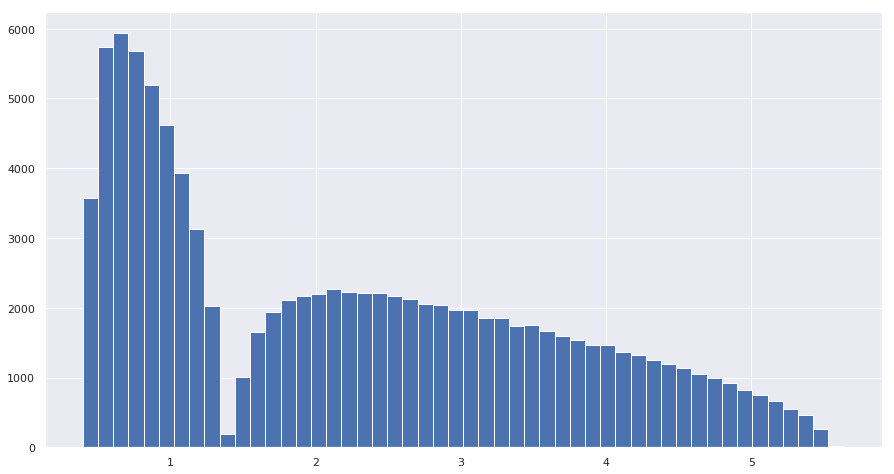

In [30]:
# Choice of N and n and nb
N = 200 # Number of samples per covariances matrix
n = 1000 # Number of features
nb = 500 # Number of covariance matrices to generate

# List of possible lambdas and their probabilities
lambdas = [1, 3]
p = np.array([0.4, 0.6])
p /= np.sum(p)

# Generate the lambdas
lambdas_l = generateLambdas(N=N, lambdas=lambdas, p=p)

# Generate the covariances and compute their spectrum
eigvals_l = samplingSpectrum(lambdas_l, n=n, nb=nb)

# Display the distribution
displayDistribution(lambdas_l, eigvals_l, N, n, nb, name="Distrib_Spectrum_Critic")

Commentaires:
------------------

Après plusieurs expérimentations, on constate donc que $c_0 = 0.2$ ext une paramétrisation critique.

## Question 4.4.(a)

In [46]:
def displayMSEn(N=20, nb_n=15, nb=20, p=[0.4, 0.6], lambdas=[1, 3], C=[[0.1, 1.9], [2, 4]],
                name="MSE_n", estimator_func=estimationLambda):
    """Display the MSE over n."""
    
    # Saving array of mse errors
    mse_l = [[] for i in range(len(lambdas))]
    
    # Sequences of N
    n_l = np.linspace(10, 1000, nb_n, dtype=int)
    
    # Loop over each N in N_L
    for i, N in enumerate(n_l):
        
        # Extract n
        n = n_l[i]

        # Generate the lambdas
        lambdas_l = generateLambdas(N=N, lambdas=lambdas, p=p)
        
        # Generate the covariances matrices
        cov_l = generateCovarianceMatrices(lambdas_l, n=n, nb=nb, law="normal")

        # Estimation of \lambda_k
        estimators_l = estimator_func(cov_l, lambdas_l, lambdas_init=lambdas, C=C, n=n)

        # Loop over each lambdas
        for k, lambda_k in enumerate(lambdas):
        
            # Compute MSE
            mse = np.mean((estimators_l[k] - lambda_k) ** 2)
            mse_l[k].append(mse)
        
    # Initialisation of the figure
    fig, axs = plt.subplots(1, 1, figsize=(10, 8))
    axs.grid(True)
    axs.set_ylabel("MSE", fontsize=22)
    axs.set_xlabel("n", fontsize=22)
    axs.set_title("MSE over n", fontsize=22)
    
    # Display the mse for each lambdas
    for k, lambda_k in enumerate(lambdas):
        
        # Display the mse over N for the current lambda_k
        axs.plot(n_l, mse_l[k], label="\lambda_k = {}".format(lambda_k),
                 marker="x", linestyle="--")
        
    # Activation of the legend
    axs.legend()
    
    # Save figure
    fig.savefig("./Results/" + name + ".png", dpi=150, bbox_inches='tight', pad_inches=0)

100%|██████████| 20/20 [02:40<00:00,  8.00s/it]


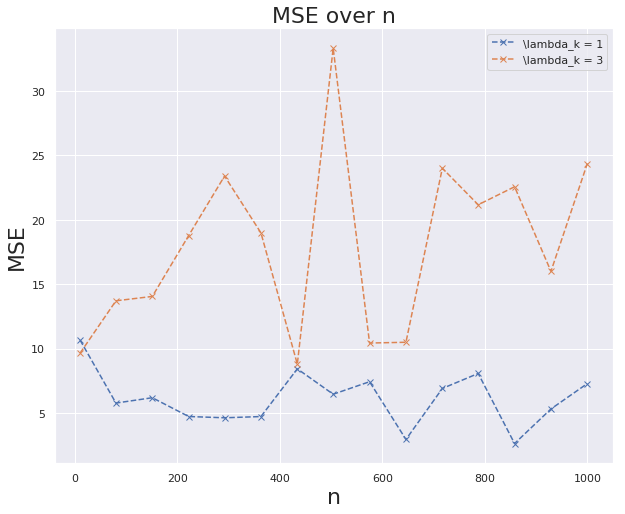

In [38]:
displayMSEn()

Commentaires:
------------------



## Question 4.4.(b)

In [40]:
def computeGn(x, lambdas_l, n):
    """Compute the value of g_n in x."""
    
    # Initialisation of g_n
    g_n = 0
    
    # N
    N = len(lambdas_l)
    
    # Loop over the lambda_i
    for lambda_i in lambdas_l:
    
        # Update g_n
        g_n += 1 / n * (1 / (lambda_i - x) ** 2)
        
    # Add zero lambdas
    for i in range(N - n):
        
        # Update g_n
        g_n += 1 / n * (1 / x ** 2)
        
    return g_n

In [63]:
np.sqrt(-1)

/home/pierre/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

In [58]:
def resolveSystem(e_1, e_2, lambdas_l, lambdas_init, plus=True):
    """Resolution of the system for estimating \lambda_1 and \lambda_2."""
    
    # Estimations of N_1 and N_2
    N_1 = list(lambdas_l).count(lambdas_init[0])
    N_2 = list(lambdas_l).count(lambdas_init[1])
    
    # Compute the sqrt
    sub_sqrt = max(0, 1 / (N_1 * (N_1 + N_2) ** 2) * ((-N_2) * e_1 ** 2 +
                                                    N_2 * (N_1 + N_2) * e_2))
    sqrt = np.sqrt(sub_sqrt)
    
    # Computation of \lambda_1
    if plus:
        lambda_1 = e_1 / (N_1 + N_2) + sqrt
    else:
        lambda_1 = e_1 / (N_1 + N_2) - sqrt
        
    # Computation of \lambda_2
    lambda_2 = e_1 / N_2 - N_1 / N_2 * lambda_1
    
    return lambda_1, lambda_2

In [59]:
def estimationLambdaNotSeparated(cov_l, lambdas_l, C=[0.1, 10], n=1000,
                                 lambdas_init=[1, 3], plus=False):
    """Estimate \Lambda_k in the case where the two lambdas are not separeted."""
    
    # Number of samples
    nb = len(cov_l)
    
    # Shape of cov
    N, _ = np.shape(cov_l[0])
    
    # Initialisation of lambdas
    estimators_l = [[] for i in lambdas_init]
    
    # Loop over all the matrices inside cov_l
    for cov in tqdm(cov_l):
        
        # Compute the eta associated
        etas = computeEta(cov, n=n)
        
        # Compute the lambdas associated
        lambdas = np.real(np.linalg.eigvals(cov))
        
        # Filter all the value inside etas and lambdas that are in C
        etas_C = list(filter(lambda x: (C[0] <= x) & (x <= C[1]), etas))
        lambdas_C = list(filter(lambda x: (C[0] <= x) & (x <= C[1]), lambdas))

        # g_n(\eta_c)
        g_n_etas_C = np.array([computeGn(eta_i, lambdas, n) for eta_i in etas_C])

        # Update the estimation of lambda_k
        e_1 = n * (np.sum(lambdas_C) - np.sum(etas_C))
        e_2 = n * np.sum( 1 / np.array(g_n_etas_C))
            
        # Resolution of the system
        lambda_1, lambda_2 = resolveSystem(e_1, e_2, lambdas_l, lambdas_init, plus=plus)
            
        # Update estimators
        estimators_l[0].append(lambda_1)
        estimators_l[1].append(lambda_2)
        
    return np.array(estimators_l)

In [60]:
# Choice of N and n
N = 20
n = 100
nb = 100

# List of possible lambdas and their probabilities
lambdas = [1, 3]
p = np.array([0.4, 0.6])
p /= np.sum(p)

# Generate the lambdas
lambdas_l = generateLambdas(N=N, lambdas=lambdas, p=p)

# Generate the covariances matrices
cov_l = generateCovarianceMatrices(lambdas_l, n=n, nb=nb, law="normal")

# Estimation of \lambda_k
estimators_l = estimationLambdaNotSeparated(cov_l, lambdas_l, lambdas_init=lambdas, n=n,
                                            plus=False)

# Display the estimation
print(estimators_l.mean(axis=1))

100%|██████████| 100/100 [00:00<00:00, 913.66it/s]

[0.96546425 3.02173337]


## Question 4.4.(c)

100%|██████████| 20/20 [03:04<00:00,  9.03s/it]


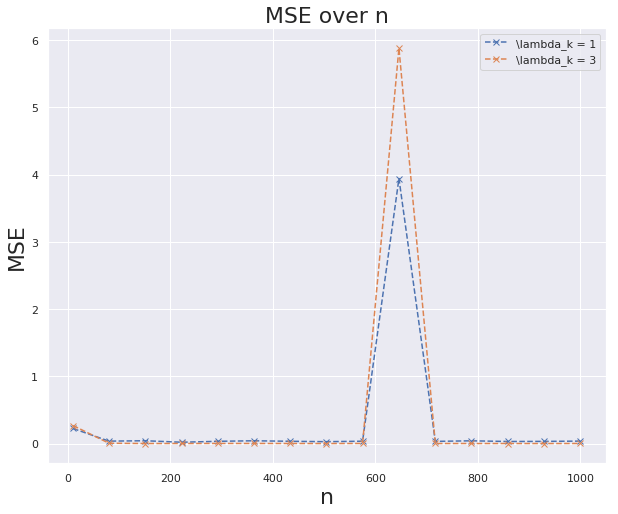

In [62]:
displayMSEn(nb=20, C=[0.1, 10], estimator_func=estimationLambdaNotSeparated,
            name="MSE_n_Not_Separated")